In [1]:
# 기본 라이브러리 설정_08_03_01
import os
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# 데이터 로딩 및 데이터 표준화_08_03_02
data_good_folder = 'data_good/'
data_bad_folder = 'data_bad/'

def load_data_from_folder(folder, label):
    data_frames = []
    for file_name in os.listdir(folder):
        if file_name.startswith('merged_') and file_name.endswith('.csv'):
            file_path = os.path.join(folder, file_name)
            df = pd.read_csv(file_path)
            df['Label'] = label  # 승부조작 경기는 1, 일반경기는 0으로 레이블 설정
            data_frames.append(df)
    return pd.concat(data_frames, ignore_index=True)
data_good = load_data_from_folder(data_good_folder, 0)
data_bad = load_data_from_folder(data_bad_folder, 1)
merged_data = pd.concat([data_good, data_bad], ignore_index=True)
X = merged_data[['HomeWin', 'Standoff', 'GuestWin']]
y = merged_data['Label']

# 데이터 표준화 (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)


In [12]:
# TensorFlow 모델 생성 및 분석_08_03_03
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
# 테스트 데이터로 예측
y_pred = model.predict(X_test)
y_pred = [1 if pred[1] > pred[0] else 0 for pred in y_pred]
# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['일반경기', '승부조작'])
print(f"모델의 정확도: {accuracy}")
print(f"분류 보고서:\n{report}")

# 모델 저장loss: 0.4390, accuracy: 0.8007
model.save("matchfixing_model.keras")


Epoch 1/100
146/146 [==============================] - 1s 3ms/step - loss: 0.6126 - accuracy: 0.6607 - val_loss: 0.5729 - val_accuracy: 0.6861
Epoch 2/100
146/146 [==============================] - 0s 2ms/step - loss: 0.5586 - accuracy: 0.7053 - val_loss: 0.5519 - val_accuracy: 0.7170
Epoch 3/100
146/146 [==============================] - 0s 2ms/step - loss: 0.5391 - accuracy: 0.7239 - val_loss: 0.5338 - val_accuracy: 0.7410
Epoch 4/100
146/146 [==============================] - 0s 1ms/step - loss: 0.5276 - accuracy: 0.7336 - val_loss: 0.5255 - val_accuracy: 0.7504
Epoch 5/100
146/146 [==============================] - 0s 2ms/step - loss: 0.5212 - accuracy: 0.7396 - val_loss: 0.5203 - val_accuracy: 0.7684
Epoch 6/100
146/146 [==============================] - 0s 2ms/step - loss: 0.5110 - accuracy: 0.7508 - val_loss: 0.5205 - val_accuracy: 0.7479
Epoch 7/100
146/146 [==============================] - 0s 1ms/step - loss: 0.5027 - accuracy: 0.7525 - val_loss: 0.5139 - val_accuracy: 0.7616

Epoch 1/100
183/183 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8130 - val_loss: 0.4218 - val_accuracy: 0.8127
Epoch 2/100
183/183 [==============================] - 0s 2ms/step - loss: 0.4075 - accuracy: 0.8181 - val_loss: 0.4119 - val_accuracy: 0.8179
Epoch 3/100
183/183 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8161 - val_loss: 0.4203 - val_accuracy: 0.8159
Epoch 4/100
183/183 [==============================] - 0s 2ms/step - loss: 0.4075 - accuracy: 0.8116 - val_loss: 0.4268 - val_accuracy: 0.8179
Epoch 5/100
183/183 [==============================] - 0s 2ms/step - loss: 0.4046 - accuracy: 0.8193 - val_loss: 0.4211 - val_accuracy: 0.8139
Epoch 6/100
183/183 [==============================] - 0s 2ms/step - loss: 0.4063 - accuracy: 0.8159 - val_loss: 0.4125 - val_accuracy: 0.8151
Epoch 7/100
183/183 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.8152 - val_loss: 0.4234 - val_accuracy: 0.8103

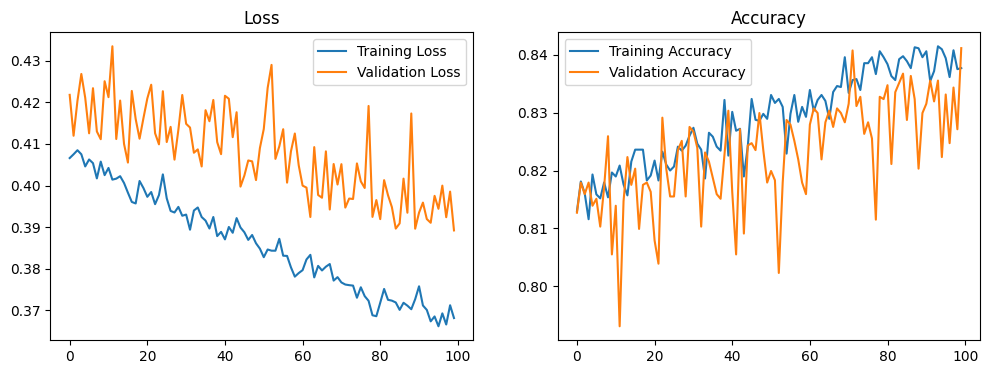

In [5]:
# 모형 성능평가 시각화
import matplotlib.pyplot as plt

# 모델 학습
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

# 손실 함수와 정확도 그래프 그리기
plt.figure(figsize=(12, 4))

# Training Loss와 Validation Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

# Training Accuracy와 Validation Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()


79/79 [==============================] - 0s 1ms/step


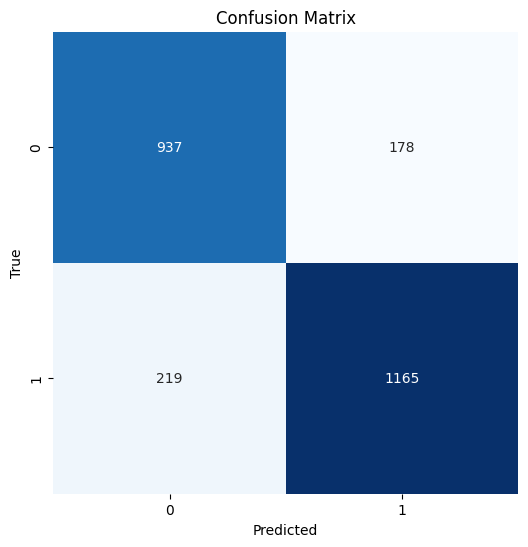

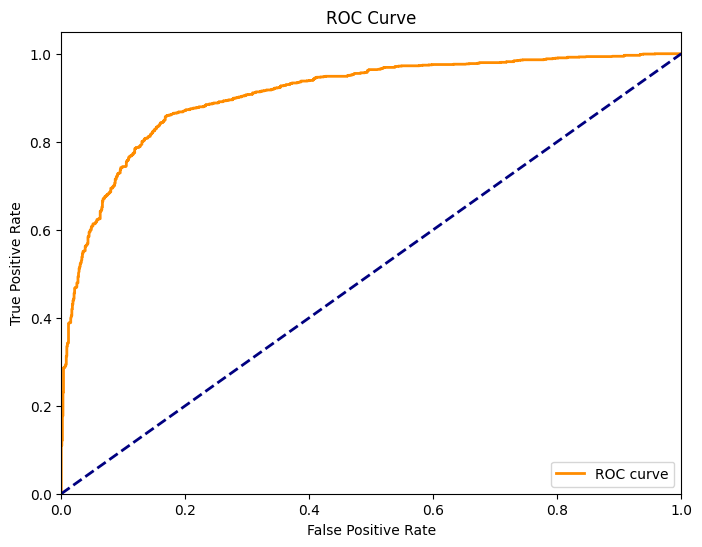

ROC AUC Score: 0.91


In [6]:
# 이원분류 차트 및 ROC 곡선
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# 실제 승부조작 여부와 모델의 예측 결과를 가져옵니다.
y_true = y_test  # 실제 승부조작 여부 (0 또는 1)
y_pred = model.predict(X_test)[:, 1]  # 모델의 예측 승부조작 확률

# Confusion Matrix 그리기
cm = confusion_matrix(y_true, (y_pred > 0.5).astype(int))
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve 그리기
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# ROC AUC Score 출력
roc_auc = roc_auc_score(y_true, y_pred)
print(f'ROC AUC Score: {roc_auc:.2f}')


In [11]:
# 신경망 구조 확인
for layer in model.layers:
    if hasattr(layer, 'weights'):
        weights = layer.get_weights()
        if len(weights) > 0:
            print(f'Layer Name: {layer.name}')
            print(f'Weights: {weights[0].shape}')

Layer Name: dense_7
Weights: (3, 120)
Layer Name: dense_8
Weights: (120, 60)
Layer Name: dense_9
Weights: (60, 2)
